<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries and uploading the data

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import absolute
from numpy import sqrt
from scipy.stats import sem
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/BCPI_MONTHLY-sd-1972-01-01.csv'

data = pd.read_csv(url)

In [5]:
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe

           date  M.BCPI  M.BCNE   M.ENER  M.MTLS   M.FOPR  M.AGRI   M.FISH
0    1972-01-01  100.00  100.00   100.00  100.00   100.00  100.00   100.00
1    1972-02-01  100.40  100.53    99.78  100.74   100.12  101.20    88.89
2    1972-03-01  101.11  101.35   100.05  101.38   100.24  102.53    98.97
3    1972-04-01  101.16  101.45    99.84  101.21   100.95  102.08   103.10
4    1972-05-01  101.88  102.30   100.00  101.25   102.32  103.53    86.30
..          ...     ...     ...      ...     ...      ...     ...      ...
592  2021-05-01  603.08  524.90  1173.22  733.52  1101.94  310.20  1451.32
593  2021-06-01  606.63  488.98  1289.50  720.94   838.80  306.31  1534.54
594  2021-07-01  593.87  455.44  1334.47  730.52   536.88  321.88  1737.96
595  2021-08-01  568.19  440.31  1261.77  738.36   437.00  328.36  1658.92
596  2021-09-01  596.69  446.58  1378.81  749.09   477.69  315.44  1718.73

[597 rows x 8 columns]


# Exploring the Dataset

In [6]:
df.dtypes
#checking the type of data

date       object
M.BCPI    float64
M.BCNE    float64
M.ENER    float64
M.MTLS    float64
M.FOPR    float64
M.AGRI    float64
M.FISH    float64
dtype: object

In [7]:
df.head(5)
# the first 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [8]:
df.tail(5)
#the last 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
592,2021-05-01,603.08,524.90,1173.22,733.52,1101.94,310.20,1451.32
593,2021-06-01,606.63,488.98,1289.50,720.94,838.80,306.31,1534.54
594,2021-07-01,593.87,455.44,1334.47,730.52,536.88,321.88,1737.96
595,2021-08-01,568.19,440.31,1261.77,738.36,437.00,328.36,1658.92
596,2021-09-01,596.69,446.58,1378.81,749.09,477.69,315.44,1718.73


In [9]:
#Describe the dataset 
df.describe()


,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,342.790369,253.76072,759.306265,360.757705,282.288224,191.433317,683.961642
std,148.170932,79.38940,477.890514,177.418661,107.034746,46.860202,403.135415
min,100.000000,100.00000,99.780000,100.000000,100.000000,100.000000,86.300000
25%,250.800000,197.67000,407.970000,237.160000,201.320000,160.550000,262.270000
50%,286.330000,232.47000,635.920000,283.060000,278.370000,178.300000,717.250000
75%,420.880000,320.50000,982.080000,536.440000,337.070000,210.920000,985.100000
max,881.310000,524.90000,2755.750000,779.920000,1101.940000,328.360000,1831.730000


In [10]:
#Renaming columns for ease
df_new = df.rename(columns={'M.BCPI': 'Total_CPI', 'M.AGRI': 'CPI_Agri', 'M.BCNE': 'CPI_NonEner', 'M.ENER': 'CPI_Ener','M.MTLS': 'CPI_Metals', 'M.FOPR': 'CPI_Forst', 'M.FISH': 'CPI_Fish'})
print(df_new)

           date  Total_CPI  CPI_NonEner  ...  CPI_Forst  CPI_Agri  CPI_Fish
0    1972-01-01     100.00       100.00  ...     100.00    100.00    100.00
1    1972-02-01     100.40       100.53  ...     100.12    101.20     88.89
2    1972-03-01     101.11       101.35  ...     100.24    102.53     98.97
3    1972-04-01     101.16       101.45  ...     100.95    102.08    103.10
4    1972-05-01     101.88       102.30  ...     102.32    103.53     86.30
..          ...        ...          ...  ...        ...       ...       ...
592  2021-05-01     603.08       524.90  ...    1101.94    310.20   1451.32
593  2021-06-01     606.63       488.98  ...     838.80    306.31   1534.54
594  2021-07-01     593.87       455.44  ...     536.88    321.88   1737.96
595  2021-08-01     568.19       440.31  ...     437.00    328.36   1658.92
596  2021-09-01     596.69       446.58  ...     477.69    315.44   1718.73

[597 rows x 8 columns]


In [11]:
print("The new columns in the Dataset are:\n",df_new.columns)

The new columns in the Dataset are:
 Index(['date', 'Total_CPI', 'CPI_NonEner', 'CPI_Ener', 'CPI_Metals',
       'CPI_Forst', 'CPI_Agri', 'CPI_Fish'],
      dtype='object')


In [12]:
#Checking the skewness and kurtosis of Total CPI, moderately skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['Total_CPI'].skew())
print("Kurtosis: %f" % df_new['Total_CPI'].kurt())

Skewness: 0.950204
Kurtosis: 0.217021


In [13]:
#Checking the skewness and kurtosis of CPI Energy, heavily skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Ener'].skew())
print("Kurtosis: %f" % df_new['CPI_Ener'].kurt())


Skewness: 1.053477
Kurtosis: 0.698279


In [14]:
#Checking the skewness and kurtosis of CPI Metals, moderately skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Metals'].skew())
print("Kurtosis: %f" % df_new['CPI_Metals'].kurt())

Skewness: 0.727674
Kurtosis: -0.783938


In [15]:
#Checking the skewness and kurtosis of CPI Energy , heavilty skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Agri'].skew())
print("Kurtosis: %f" % df_new['CPI_Agri'].kurt())

Skewness: 1.081845
Kurtosis: 0.736573


In [16]:
#Checking the skewness and kurtosis of CPI Forestry, heavilty skewed, kurtosis at extreemes distribution thin and tall lepyokurtic
print("Skewness: %f" % df_new['CPI_Forst'].skew())
print("Kurtosis: %f" % df_new['CPI_Forst'].kurt())

Skewness: 1.959044
Kurtosis: 9.805375


In [17]:
#Checking the skewness and kurtosis of CPI Fish, fairly skewed, kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Fish'].skew())
print("Kurtosis: %f" % df_new['CPI_Fish'].kurt())

Skewness: 0.170690
Kurtosis: -1.106872


In [18]:
min(df_new.Total_CPI)
#checking the year and month where the CPI was lowest

100.0

In [19]:
max(df_new.Total_CPI)

#checking the year and month where the CPI was highest

881.31

In [20]:
max(df_new.date)

'2021-09-01'

In [21]:
df_new.isnull().sum()
#checking for null values

date           0
Total_CPI      0
CPI_NonEner    0
CPI_Ener       0
CPI_Metals     0
CPI_Forst      0
CPI_Agri       0
CPI_Fish       0
dtype: int64

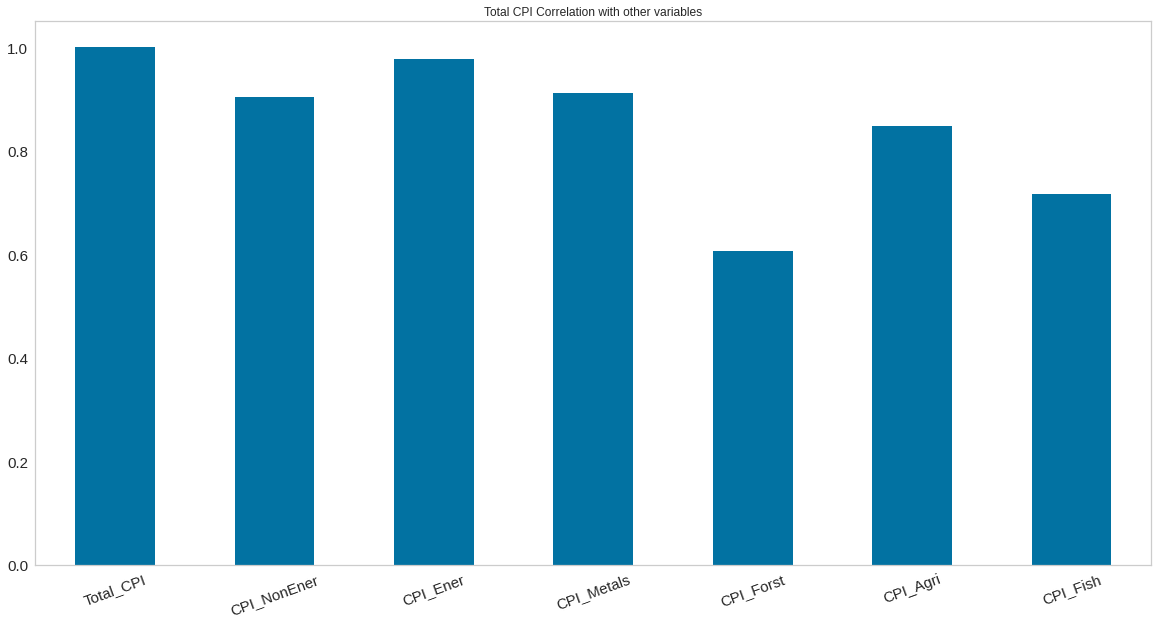

In [22]:
df_new.corrwith(df_new.Total_CPI).plot.bar(
figsize = (20, 10), title = "Total CPI Correlation with other variables", fontsize = 15, rot = 20, grid = False)

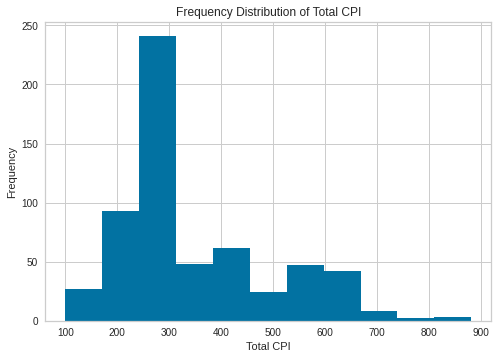

In [23]:
plt.hist(x=df_new['Total_CPI'], bins=11)
plt.xlabel("Total CPI")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Total CPI")
plt.show()

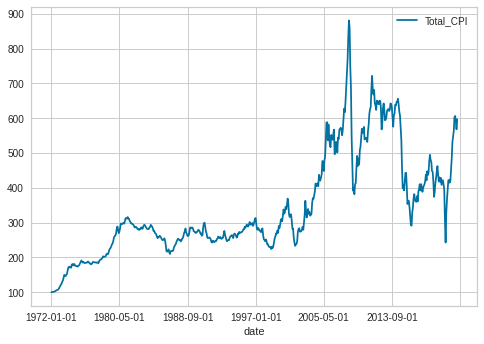

In [24]:
ax = df_new.plot(x='date', y='Total_CPI', rot=0)
plt.legend()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.903644,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_NonEner,0.903644,1.000000,0.804170,0.967183,0.822376,0.874488,0.830922
CPI_Ener,0.977267,0.804170,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.967183,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.822376,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.874488,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.830922,0.631449,0.763231,0.810035,0.598726,1.000000


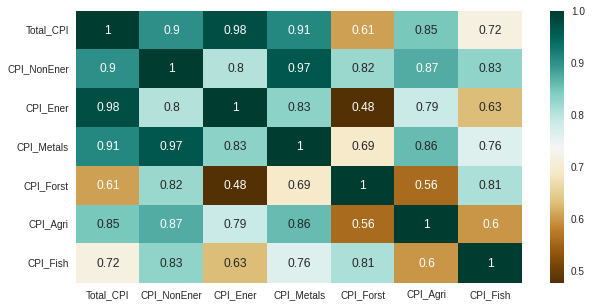

In [25]:
plt.figure(figsize=(10,5))
cor= df_new.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [26]:
df1 = df_new.drop(['CPI_NonEner', 'date'], axis=1)
df1.head()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
0,100.00,100.00,100.00,100.00,100.00,100.00
1,100.40,99.78,100.74,100.12,101.20,88.89
2,101.11,100.05,101.38,100.24,102.53,98.97
3,101.16,99.84,101.21,100.95,102.08,103.10
4,101.88,100.00,101.25,102.32,103.53,86.30


In [27]:
df1.tail()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
592,603.08,1173.22,733.52,1101.94,310.20,1451.32
593,606.63,1289.50,720.94,838.80,306.31,1534.54
594,593.87,1334.47,730.52,536.88,321.88,1737.96
595,568.19,1261.77,738.36,437.00,328.36,1658.92
596,596.69,1378.81,749.09,477.69,315.44,1718.73


In [28]:

df1.corr()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_Ener,0.977267,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.631449,0.763231,0.810035,0.598726,1.000000


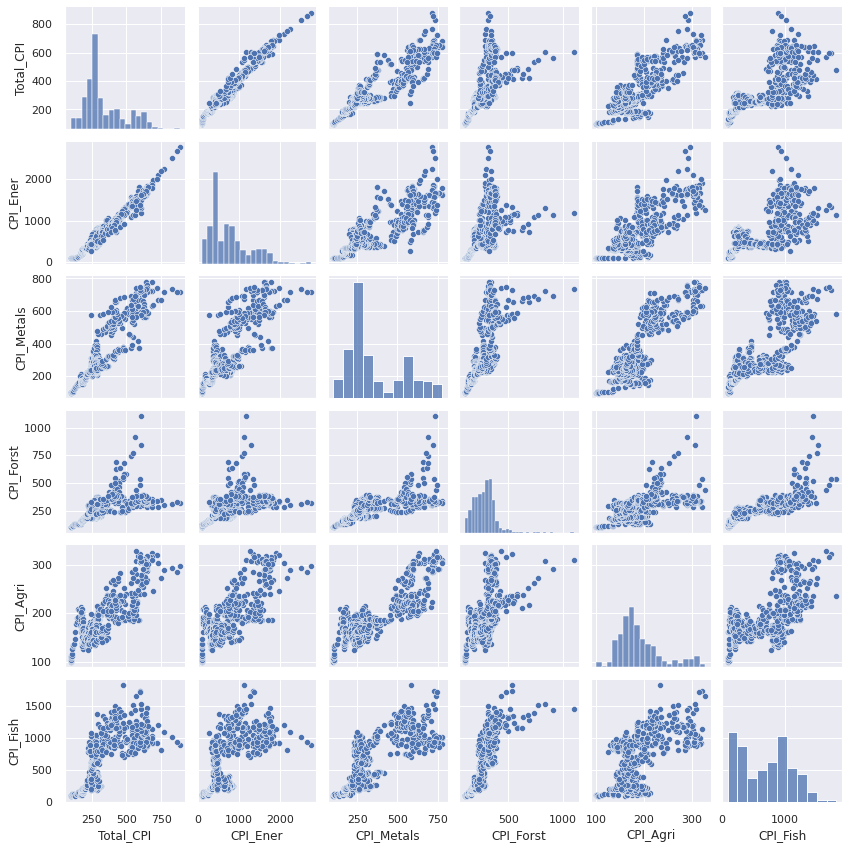

In [29]:

sns.set()
cols = ['Total_CPI', 'CPI_Ener', 'CPI_Metals', 'CPI_Forst', 'CPI_Agri', 'CPI_Fish']
sns.pairplot(df1[cols], height = 2)
plt.show()

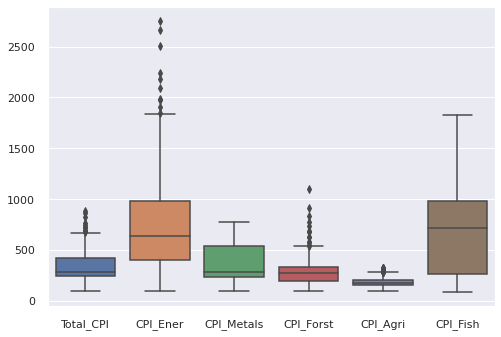

In [30]:
ax = sns.boxplot( data=df1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



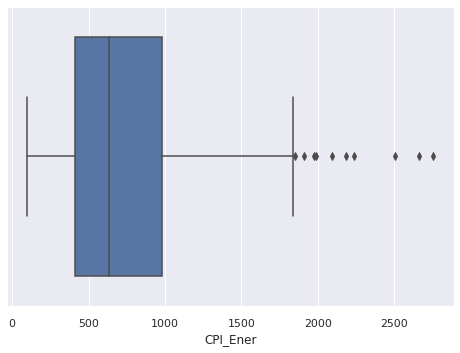

In [31]:
sns.boxplot(df1['CPI_Ener'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



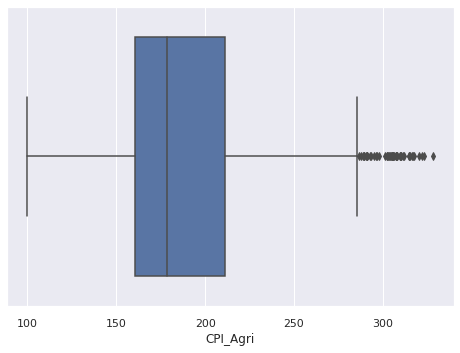

In [32]:
sns.boxplot(df1['CPI_Agri'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



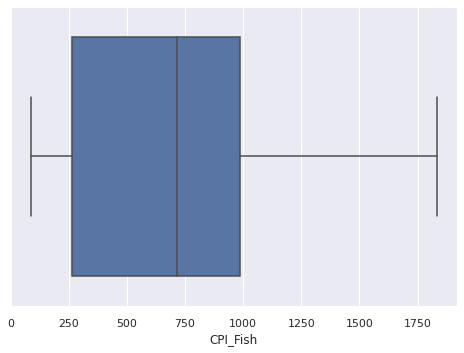

In [33]:
sns.boxplot(df1['CPI_Fish'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



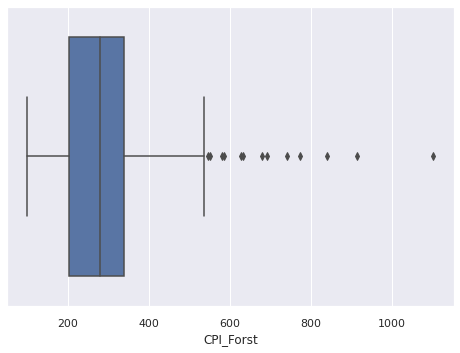

In [34]:
sns.boxplot(df1['CPI_Forst'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



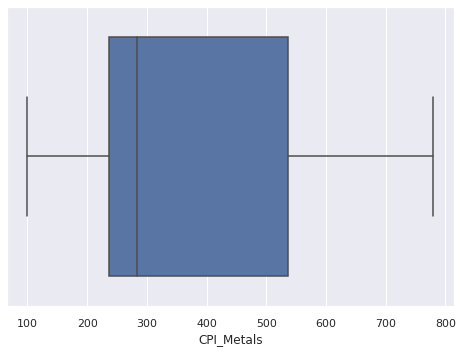

In [35]:
sns.boxplot(df1['CPI_Metals'])



# Multiple Linear Regression

**Defined the independent variables (x)  and dependent variable ( y )**


In [36]:
mlrdf=df1

feature_cols=['CPI_Ener','CPI_Agri','CPI_Forst','CPI_Metals','CPI_Fish']
x =mlrdf[feature_cols]
y =mlrdf['Total_CPI'].values

#Splitting the dataset in training and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

#Train the model on the training set
ml=LinearRegression()
ml.fit(x_train, y_train)

#y_pred for model 2
y_pred=ml.predict(x_test)

# The coefficients
print("Coefficients: \n", ml.coef_)
# The intercept
print("Intercept: \n", ml.intercept_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))



Coefficients: 
 [0.22475635 0.20458759 0.13616469 0.14692327 0.00283547]
Intercept: 
 39.1361624311034
Mean squared error: 169.8542
Mean absolute error: 10.6332
Coefficient of determination: 0.9927


In [37]:
# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:11:37   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4868.
Df Residuals:                     591   BIC:                             4895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6080      3.275     12.400      0.0

**Predict the test set results**

In [38]:
y_pred=ml.predict(x_test)


In [39]:
ml.predict([[1378.81,749.09,477.69,315.44,1718.73]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([618.55039264])

In [40]:
feature_cols=['CPI_Ener','CPI_Agri','CPI_Forst','CPI_Metals']
x1=mlrdf[feature_cols]
y=mlrdf['Total_CPI'].values

#Splitting the dataset in training and test sets
x_train,x_test,y_train,y_test=train_test_split(x1,y, test_size=0.3, random_state=0)

#Train the model on the training set
ml1=LinearRegression()
ml1.fit(x_train, y_train)

#y_pred for model 2
y_pred=ml1.predict(x_test)

# The coefficients
print("Coefficients: \n", ml1.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.22531718 0.19906575 0.14209499 0.14938454]
Mean squared error: 167.9351
Mean absolute error: 10.6143
Coefficient of determination: 0.9928


In [41]:
# with statsmodels
x1 = sm.add_constant(x1) # adding a constant
 
model = sm.OLS(y, x1).fit()
predictions = model.predict(x1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:11:37   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4866.
Df Residuals:                     592   BIC:                             4888.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6108      3.271     12.415      0.0

In [42]:
feature_cols=['CPI_Ener','CPI_Agri','CPI_Forst']
x2=mlrdf[feature_cols]
y=mlrdf['Total_CPI'].values

#Splitting the dataset in training and test sets
x_train,x_test,y_train,y_test=train_test_split(x2,y, test_size=0.3, random_state=0)

#Train the model on the training set
ml2=LinearRegression()
ml2.fit(x_train, y_train)

#y_pred for model 3
y_pred=ml2.predict(x_test)

# The coefficients
print("Coefficients: \n", ml2.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.24613521 0.40671449 0.21945948]
Mean squared error: 271.9314
Mean absolute error: 12.1528
Coefficient of determination: 0.9883


In [43]:
# with statsmodels
x2 = sm.add_constant(x2) # adding a constant
 
model = sm.OLS(y, x2).fit()
predictions = model.predict(x2) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 1.450e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:11:37   Log-Likelihood:                -2544.4
No. Observations:                 597   AIC:                             5097.
Df Residuals:                     593   BIC:                             5114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6411      3.537      4.422      0.0

In [44]:
feature_cols=['CPI_Ener','CPI_Agri']
x3=mlrdf[feature_cols]
y=mlrdf['Total_CPI'].values

#Splitting the dataset in training and test sets
x_train,x_test,y_train,y_test=train_test_split(x3,y, test_size=0.3, random_state=0)

#Train the model on the training set
ml3=LinearRegression()
ml3.fit(x_train, y_train)

#y_pred for model 4
y_pred=ml3.predict(x_test)

# The coefficients
print("Coefficients: \n", ml3.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.24953399 0.67134281]
Mean squared error: 513.0916
Mean absolute error: 17.8607
Coefficient of determination: 0.9780


In [45]:
# with statsmodels
x3 = sm.add_constant(x3) # adding a constant
 
model = sm.OLS(y, x3).fit()
predictions = model.predict(x3) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     9878.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:11:37   Log-Likelihood:                -2775.7
No. Observations:                 597   AIC:                             5557.
Df Residuals:                     594   BIC:                             5571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0143      5.167      5.228      0.0

In [46]:
feature_cols=['CPI_Ener']
x4=mlrdf[feature_cols]
y=mlrdf['Total_CPI'].values

#Splitting the dataset in training and test sets
x_train,x_test,y_train,y_test=train_test_split(x4,y, test_size=0.3, random_state=0)

#Train the model on the training set
ml4=LinearRegression()
ml4.fit(x_train, y_train)

#y_pred for model 5
y_pred=ml4.predict(x_test)


# The coefficients
print("Coefficients: \n", ml4.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [0.30103038]
Mean squared error: 836.3931
Mean absolute error: 21.9787
Coefficient of determination: 0.9641


In [47]:
# with statsmodels
x4= sm.add_constant(x4) # adding a constant
 
model = sm.OLS(y, x4).fit()
predictions = model.predict(x4) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.264e+04
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:11:37   Log-Likelihood:                -2904.6
No. Observations:                 597   AIC:                             5813.
Df Residuals:                     595   BIC:                             5822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.7179      2.417     46.631      0.0

**Evaluate the accuracy of our model**

In [48]:
r2_score(y_test, y_pred)

0.964133262019868

**Plot the results**

Text(0.5, 1.0, 'Actual vs. Predicted Total CPI')

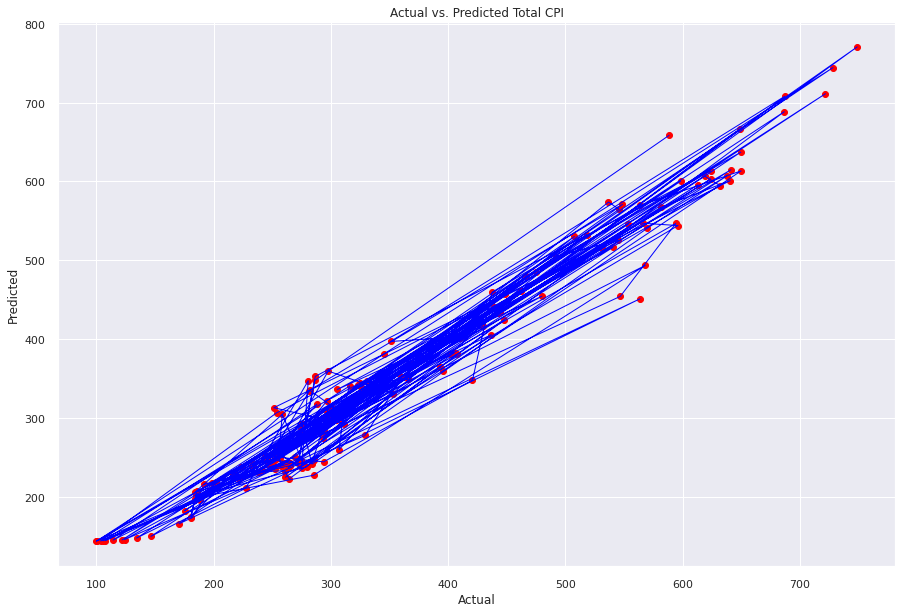

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color="red")
plt.plot(y_test, y_pred, color="blue", linewidth=1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Total CPI')



**Predicted Values**

In [50]:
pred_y_df=pd.DataFrame({'Actual Total CPI':y_test, 'Predicted Total CPI': y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Total CPI,Predicted Total CPI,Difference
0,588.52,658.505417,-69.985417
1,286.53,347.607259,-61.077259
2,271.99,242.493471,29.496529
3,252.32,246.205175,6.114825
4,221.61,222.032436,-0.422436
5,322.98,342.002074,-19.022074
6,274.67,285.134424,-10.464424
7,443.01,433.009579,10.000421
8,649.60,637.123229,12.476771
9,466.86,480.033535,-13.173535


**Principal Componnent Analysis (PCA)**

In [51]:
mlrdfpca=df1

feature_cols=['CPI_Ener','CPI_Agri','CPI_Forst','CPI_Metals','CPI_Fish']
x=mlrdfpca[feature_cols]
y=mlrdfpca['Total_CPI'].values

#standard scaling
scaler=StandardScaler()
X_scaled= scaler.fit_transform(mlrdfpca)



In [52]:

X_scaled

array([[-1.63995706, -1.38077472, -1.47096348, -1.70450339, -1.95282962,
        -1.44976431],
       [-1.63725521, -1.38123547, -1.46678905, -1.70338132, -1.92720006,
        -1.4773464 ],
       [-1.63245943, -1.38067001, -1.46317874, -1.70225925, -1.89879396,
        -1.45232143],
       ...,
       [ 1.69594789,  1.20455635,  2.0858706 ,  2.38058462,  2.78607576,
         2.61669448],
       [ 1.52248921,  1.05230188,  2.13009692,  1.44664718,  2.92447537,
         2.42046691],
       [ 1.71499593,  1.29741691,  2.19062605,  1.8271229 ,  2.64853046,
         2.56895339]])

In [53]:
pca=PCA(n_components=5)
x_pca= pca.fit_transform(X_scaled)

In [54]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)

In [55]:
mlpca= LinearRegression()
mlpca.fit(x_train_pca, y_train)


LinearRegression()

In [56]:
pca.explained_variance_ratio_

array([0.78584837, 0.12682708, 0.04522605, 0.02503418, 0.01611175])

In [57]:
#y_pred for model with 5 components
y_pred=mlpca.predict(x_test_pca)

# The coefficients
print("Coefficients: \n", mlpca.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 65.37632046 -38.57400259 -34.21004854  34.49846541  -6.11664964]
Mean squared error: 64.6420
Mean absolute error: 6.5590
Coefficient of determination: 0.9972


In [58]:

pca1=PCA(n_components=4)
x_pca= pca1.fit_transform(X_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)
mlpca1= LinearRegression()
mlpca1.fit(x_train_pca, y_train)
pca1.explained_variance_ratio_

array([0.78584837, 0.12682708, 0.04522605, 0.02503418])

In [59]:
#y_pred for model with 4 components
y_pred=mlpca1.predict(x_test_pca)

# The coefficients
print("Coefficients: \n", mlpca1.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 65.40823956 -38.71152322 -34.17634961  34.53347714]
Mean squared error: 67.5578
Mean absolute error: 6.7806
Coefficient of determination: 0.9971


In [60]:

pca2=PCA(n_components=3)
x_pca= pca2.fit_transform(X_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)
mlpca2= LinearRegression()
mlpca2.fit(x_train_pca, y_train)
pca2.explained_variance_ratio_

array([0.78584837, 0.12682708, 0.04522605])

In [61]:
#y_pred for model with 3 component
y_pred=mlpca2.predict(x_test_pca)

# The coefficients
print("Coefficients: \n", mlpca2.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 65.55657334 -38.63335385 -33.17366089]
Mean squared error: 288.5174
Mean absolute error: 12.2370
Coefficient of determination: 0.9876


In [62]:

pca3=PCA(n_components=2)
x_pca= pca3.fit_transform(X_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)
mlpca3= LinearRegression()
mlpca3.fit(x_train_pca, y_train)
pca3.explained_variance_ratio_

array([0.78584837, 0.12682708])

In [63]:
#y_pred for model with 2 components
y_pred=mlpca3.predict(x_test_pca)

# The coefficients
print("Coefficients: \n", mlpca3.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 65.6686917  -38.99439903]
Mean squared error: 674.3098
Mean absolute error: 19.2301
Coefficient of determination: 0.9711


In [64]:

pca4=PCA(n_components=1)
x_pca= pca4.fit_transform(X_scaled)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)
mlpca4= LinearRegression()
mlpca4.fit(x_train_pca, y_train)
pca4.explained_variance_ratio_

array([0.78584837])

In [65]:
#y_pred for model with 1 component
y_pred=mlpca4.predict(x_test_pca)

# The coefficients
print("Coefficients: \n", mlpca4.coef_)
# The mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
#print result of MAE
print("Mean absolute error: %.4f" %metrics.mean_absolute_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))

Coefficients: 
 [65.0934715]
Mean squared error: 1825.0830
Mean absolute error: 30.8936
Coefficient of determination: 0.9217


Text(0.5, 1.0, 'Measured vs. Predicted PCA Total CPI')

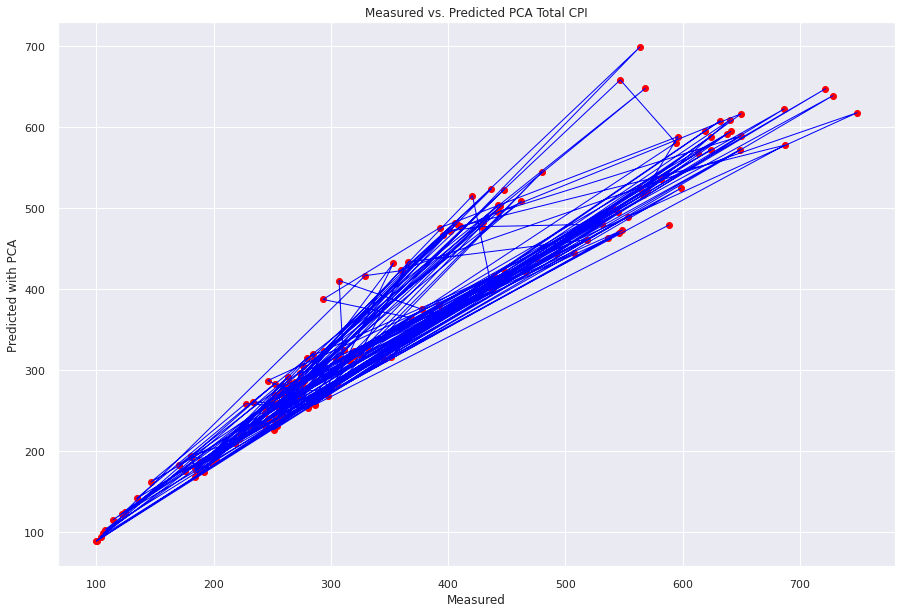

In [66]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color="red")
plt.plot(y_test, y_pred, color="blue", linewidth=1)
plt.xlabel('Measured')
plt.ylabel('Predicted with PCA')
plt.title('Measured vs. Predicted PCA Total CPI')

In [67]:
pred_y_df2=pd.DataFrame({'Actual Total CPI':y_test, 'Predicted Total CPI': y_pred, 'Difference':y_test-y_pred})
pred_y_df2[0:20]

,Actual Total CPI,Predicted Total CPI,Difference
0,588.52,478.568330,109.951670
1,286.53,256.734148,29.795852
2,271.99,266.113711,5.876289
3,252.32,268.584013,-16.264013
4,221.61,214.256038,7.353962
5,322.98,321.856492,1.123508
6,274.67,286.732574,-12.062574
7,443.01,494.734000,-51.724000
8,649.60,588.295789,61.304211
9,466.86,420.728891,46.131109


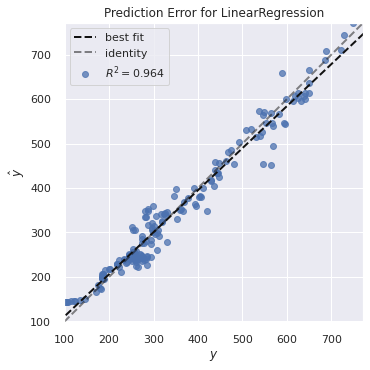

In [68]:
model1 = LinearRegression()

visualizer = PredictionError(model1)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 

visualizer.show()

# **Random Forest Regressor**

In [69]:
rfdf=df1

features = ['CPI_Ener', 'CPI_Agri', 'CPI_Forst', 'CPI_Fish', 'CPI_Metals']
# Separating out the features
x = rfdf.loc[:, features].values
# Separating out the target
y = rfdf.loc[:,['Total_CPI']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [70]:
# Labels are the values we want to predict
pred = np.array(rfdf['Total_CPI'])
# Remove the labels from the features
# axis 1 refers to the columns
rfdf = rfdf.drop('Total_CPI', axis = 1)
# Saving feature names for later use
feature_list = list(rfdf.columns)
# Convert to numpy array
rfdf = np.array(rfdf)

In [71]:

# Split the data into training and testing sets
train_features, test_features, train_pred, test_pred = train_test_split(rfdf, pred, test_size = 0.30, random_state = 42)

In [72]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_pred.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_pred.shape)

Training Features Shape: (417, 5)
Training Labels Shape: (417,)
Testing Features Shape: (180, 5)
Testing Labels Shape: (180,)


In [73]:
# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);


In [74]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error : 8.199326666666671
Mean Squared Error: 389.2017277475566


In [81]:
# Calculate the absolute errors
errors = abs(predictions - test_pred)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.08 %.


In [82]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);

In [144]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error : 7.902448611111122
Mean Squared Error: 348.79569695879


In [156]:
# Calculate the absolute errors
errors = abs(predictions - test_pred)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.12 %.


In [157]:
# Instantiate model with 150 decision trees
rf = RandomForestRegressor(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);

In [158]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error : 7.930631851851866
Mean Squared Error: 361.60290932646933


In [159]:
# Calculate the absolute errors
errors = abs(predictions - test_pred)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.12 %.


In [160]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);

In [161]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error : 9.940138888888892
Mean Squared Error: 337.00271430555574


In [162]:
# Calculate the absolute errors
errors = abs(predictions - test_pred)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.18 %.


In [163]:
# Instantiate model with 2 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_pred);

In [165]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error : 7.902448611111122
Mean Squared Error: 348.79569695879


In [166]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_pred)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 97.18 %.


In [94]:
# Pull out one tree from the forest
tree = rf.estimators_[5]


# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [95]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_pred)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


In [96]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(rfdf, round(importance, 2)) for rfdf, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CPI_Ener             Importance: 0.92
Variable: CPI_Metals           Importance: 0.04
Variable: CPI_Forst            Importance: 0.03
Variable: CPI_Agri             Importance: 0.01
Variable: CPI_Fish             Importance: 0.0


In [167]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 2, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('CPI_Ener'),feature_list.index('CPI_Metals')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_pred)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_pred)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

mape = np.mean(100 * (errors / test_pred))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

print('Mean Absolute Error :', metrics.mean_absolute_error(predictions, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(predictions, test_pred))


Mean Absolute Error: 11.54 dollars.
Accuracy: 96.74 %.
Mean Absolute Error : 11.538111111111109
Mean Squared Error: 409.27487305555564


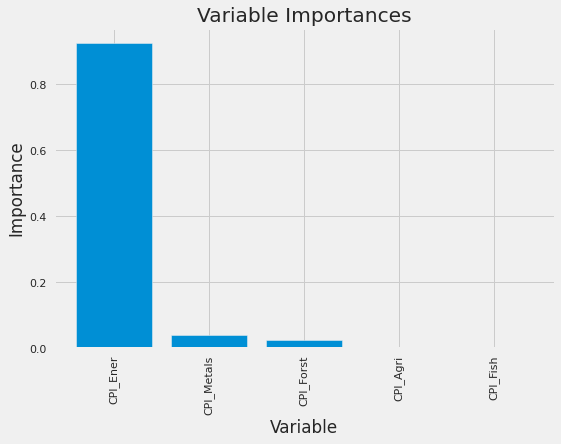

In [98]:
#Vizualizing the imporatnce of the variables
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

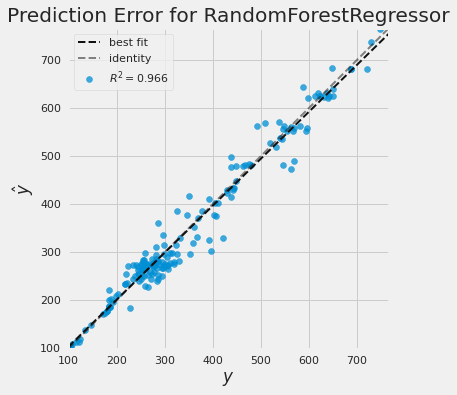

In [99]:
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 

visualizer.show() 

# K Fold Validation

In [100]:
kfdf1 = df1

In [101]:
X = kfdf1.drop('Total_CPI', axis =1).values
Y = kfdf1['Total_CPI'].values

In [102]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [103]:
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.00%


In [104]:
kfold = model_selection.KFold(n_splits=9, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 98.96%


In [105]:
kfold = model_selection.KFold(n_splits=8, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.00%


In [106]:
kfold = model_selection.KFold(n_splits=7, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.01%


In [107]:
kfold = model_selection.KFold(n_splits=6, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 98.98%


In [108]:
kfold = model_selection.KFold(n_splits=5, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.01%


In [109]:
kfold = model_selection.KFold(n_splits=4, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.02%


In [110]:
kfold = model_selection.KFold(n_splits=3, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.06%


In [111]:
kfold = model_selection.KFold(n_splits=2, random_state=100, shuffle = True)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 98.97%


In [112]:
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

# evaluate a logistic regression model using repeated k-fold cross-validation, 10-fold

Accuracy: 99.66%


In [113]:
kfold = model_selection.KFold(n_splits=9, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.65%


In [114]:
kfold = model_selection.KFold(n_splits=8, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.65%


In [115]:
kfold = model_selection.KFold(n_splits=7, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.58%


In [116]:
kfold = model_selection.KFold(n_splits=6, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.62%


In [117]:
kfold = model_selection.KFold(n_splits=5, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.58%


In [118]:
kfold = model_selection.KFold(n_splits=4, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.49%


In [119]:
kfold = model_selection.KFold(n_splits=3, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.42%


In [120]:
kfold = model_selection.KFold(n_splits=2, random_state=100, shuffle = True)
model_kfold = RandomForestRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 99.15%


In [121]:
#5-KFold for our test data
scores_mlpred = cross_val_score(LinearRegression(),x_test_pca,y_test, cv=5)
scores_mlpred

array([0.92673273, 0.94568482, 0.92922221, 0.88601403, 0.90561118])

In [122]:
#Average of the 10-KFold values for our test data - Regression Model
print(np.mean(scores_mlpred))

0.918652995809793


In [123]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.26489166950713

In [124]:
#define cross-validation method to use
cv = KFold(n_splits=9, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.261729352121538

In [125]:
#define cross-validation method to use
cv = KFold(n_splits=8, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.285508652060216

In [126]:
#define cross-validation method to use
cv = KFold(n_splits=7, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.266476570759572

In [127]:
#define cross-validation method to use
cv = KFold(n_splits=6, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.324321407698875

In [128]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.269653536517819

In [129]:
#define cross-validation method to use
cv = KFold(n_splits=4, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.226527046075146

In [130]:
#define cross-validation method to use
cv = KFold(n_splits=3, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.285058970951743

In [131]:
#define cross-validation method to use
cv = KFold(n_splits=2, random_state=1, shuffle=True)

model=LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.298852931680615

In [132]:

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))


9.035580820129436

In [133]:
#define cross-validation method to use
cv = KFold(n_splits=9, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

8.79590530772852

In [134]:
#define cross-validation method to use
cv = KFold(n_splits=8, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

8.93973427393726

In [135]:
#define cross-validation method to use
cv = KFold(n_splits=7, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

8.941607845636014

In [136]:
#define cross-validation method to use
cv = KFold(n_splits=6, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

9.200694855444937

In [137]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

9.277187966089704

In [138]:
#define cross-validation method to use
cv = KFold(n_splits=4, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

9.445318003206497

In [139]:
#define cross-validation method to use
cv = KFold(n_splits=3, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

9.863470784775037

In [140]:
#define cross-validation method to use
cv = KFold(n_splits=2, random_state=1, shuffle=True)

model=RandomForestRegressor()
#use k-fold CV to evaluate model
scores = cross_val_score(rf_most_important, x,y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean square error
mean(absolute(scores))

scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

14.84221485824395

In [141]:
#10-KFold Test Values - Random Forest Regressor Model
scores_rfpred= cross_val_score(RandomForestRegressor(),x_test,np.ravel(y_test,order='C'), cv=5)
scores_rfpred

array([0.95891695, 0.96418835, 0.97595135, 0.93255091, 0.97393505])

In [142]:
#Average of the 10-KFold values for our test data - Random Forest Regressor Model
print(np.mean(scores_rfpred))

0.9611085221081337


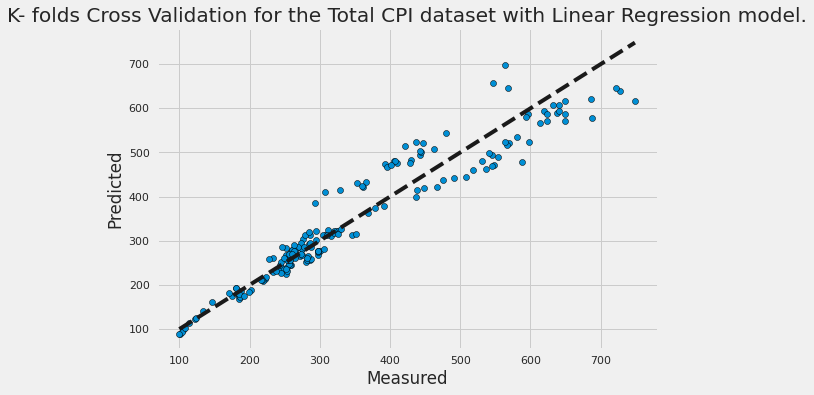

In [143]:
fig, ax=plt.subplots()
ax.scatter(y_test,y_pred, edgecolors=(0,0,0))
ax.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('K- folds Cross Validation for the Total CPI dataset with Linear Regression model.')
plt.show()